<font color ='Navy'><center> __BruFace__ </center></font>
<br> MA1 Mechanical Engineering <br>  __Vibrations and Acoustics__ <br> Academic year 2022-2023 <br> 
***
***
<font color='Navy'><h1><center>Session 1 : One DOF system</center></h1></font> 
***
 

<div class="alert alert-block alert-info">
<center><b>Welcome to the first session </b></center>

In [1]:
# don't worry about this line 
%matplotlib notebook

__During the parctical session we will make use of three very common library in python. Namely, numpy, scipy and matplotlib__ 
<br>
1. NumPy is a fundamental package for scientific computing in Python. It provides powerful matrix manupulation, basic linear algebra and much more
2. SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python.
3. Matplotlib is a Python 2D plotting library. <br>
***
NB : let me remind you that a package is just a collection of code (module) that you can import and use. If you want to learn more about a package, you shall go and visit the website of the package.

In [2]:
# let's import both numpy and matplotlib.pyplot 
# the "as" in the code bellow is to tell python that if we reference to the package using np and plt 
import numpy as np
import matplotlib.pyplot as plt 


__Then when we want to use a function "foo" in the package numpy we have to type np.foo(arguments)__

# Session content
__Motivation :__ <br>
__Table of content :__ 


# Exercise 1 

Consider the following one-degree-of-freedom (1 DOF) system :
<img src="./Images/SDOF.png" width=200 height=200 />


<b> Write the equation of motion in the time domain: </b>


In [3]:
def calcW_n(k:float,m:float):
    """
    Implement the expression of W_n

    Arguments:
    k, m -- parameters of the SDOF system

    Returns:
    w_n -- the value of w_n, computed using the formula seen in the course
    """   

    ### BEGIN SOLUTION
    w_n = np.sqrt(k/m)
    ### END SOLUTION

    return w_n
    

In [4]:
assert calcW_n(12,3)==2.0
assert calcW_n(16,4) == 2.0
assert calcW_n(64,4) == 4.0

In [5]:
for i in range(5):
    a=np.random.randint(100)
    b=np.random.randint(100)
    assert calcW_n(a,b)==np.sqrt(a/b)

In [6]:
def calcXi(c:float,m:float,k:float):
    """
    Implement the expression of W_n
    
    Arguments:
    k,m -- parameter of the SDOF system
    
    Returns:
    w_n -- the value of w_n, computed using the formula seen in the course
    """   

    ### BEGIN SOLUTION
    Xi= c/(2*np.sqrt(m*k))
    ### END SOLUTION
    return Xi

In [7]:
assert calcXi(20,1,1)==10.0
assert calcXi(20,2,2) == 5.0
assert calcXi(36,3,3) == 6.0

In [8]:
for i in range(5):
    a=np.random.randint(1,100)
    b=np.random.randint(1,100)
    c=np.random.randint(1,100)
    
    assert calcXi(a,b,c)==a/(2*np.sqrt(b*c))

In [9]:
def calcW_d(wn:float,xi:float):
    """
    Implement the expression of W_n
    
    Arguments:
    k,m -- parameter of the SDOF system
    
    Returns:
    w_n -- the value of w_n, computed using the formula seen in the course
    """   

    ### BEGIN SOLUTION
    wd= wn*np.sqrt(1-xi**2)
    ### END SOLUTION
    return wd

In [10]:
def impulse_response(m:float,c:float,k:float,t:np.ndarray):
    """
    Implement the SDOF impulse response 
    
    Arguments:
    m, c and k -- Parameter of the system 
                -- m is in kg
                -- c is in N.s.m^-1
                -- k is in N.m^-1
    
    Returns:
    h -- the value of function h, computed using 
        expression of the impulse response
    -----------------------------
    tips :  1.call the function defined above to compute Xi and Wn and 
              save them in a local variable
            2.define a variable wd first
            3.use np.exp and np.sin
    -----------------------------
    """
    # as we are computing a numerical solution we need to define 
    # a time vector
    
    ### BEGIN SOLUTION
    Xi=calcXi(c=c,m=m,k=k)
    w_n=calcW_n(k=k,m=m)
    
    w_d= w_n*np.sqrt(1-Xi**2)
    h=1/(m*w_d)*np.exp(-Xi*w_d*t)*np.sin(w_d*t)
    ### END SOLUTION
    return h ,t
    

In [12]:
t =np.arange(start=0,stop=100,step=0.1)

h,t=impulse_response(m=1,k=16,c=0.1,t=t)

<div class="alert alert-block alert-info">
<b>NB:</b> In the following cell we will plot the result that we just computed Using the matplotlib library 

<IPython.core.display.Javascript object>


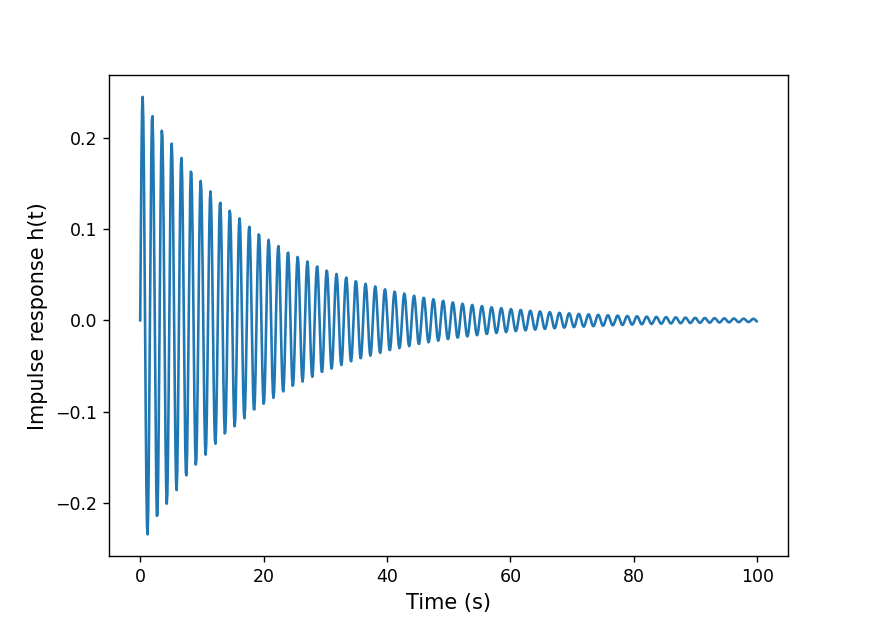

In [13]:
# let's instantiate an empty figure , figsize set the dimension
plt.figure(figsize=(7,5))
# let's fill our figure with the data we found after using our 
# impulse response data
plt.plot(t,h)
# let's add labels to our axes
plt.xlabel('Time (s)',fontsize=12)
plt.ylabel('Impulse response h(t)',fontsize=12)
plt.show()


<div class="alert alert-block alert-info">
<b> You don't have to understand the following cell. It is a bonus cell for you to have an interactive plot where you can change the system variable and see there impact on the impulse response, Xi, w_n and w_d  </b>

 

<IPython.core.display.Javascript object>


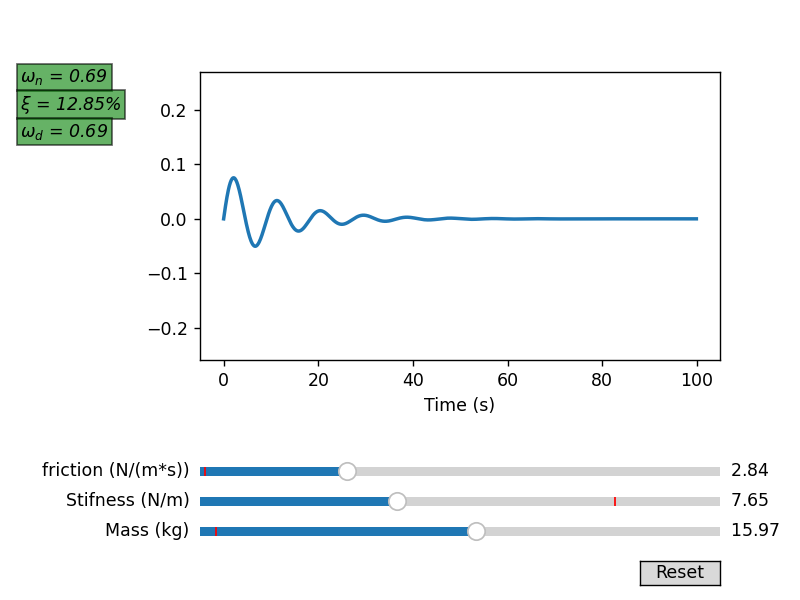

In [14]:
from ipywidgets import interact, fixed
from matplotlib.widgets import Slider, Button


# Define initial parameters
init_m = 1
init_k = 16
init_c = 0.1

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()

t =np.arange(start=0,stop=100,step=0.1)
h,t=impulse_response(m=init_m,k=init_k,c=init_c,t=t)
line, = plt.plot(t,h, lw=2)
ax.set_xlabel('Time (s)')

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.4)

wn=calcW_n(k=init_k,m=init_m)
Xi=calcXi(c=init_c,k=init_k,m=init_m)
wd= wn*np.sqrt(1-Xi**2)

text_wn = plt.text(-43, 0.25, f'$\omega_n$ = {wn:.2f}',
        style ='italic',
        fontsize = 10,
        bbox ={'facecolor':'green',
            'alpha':0.6, 'pad':2})

text_Xi = plt.text(-43, 0.2, f'$ \\xi $ = {Xi*100:.2f}%',
        style ='italic',
        fontsize = 10,
        bbox ={'facecolor':'green',
            'alpha':0.6, 'pad':2})

text_wd = plt.text(-43, 0.15, f'$ \omega_d $ = {wd:.2f}',
        style ='italic',
        fontsize = 10,
        bbox ={'facecolor':'green',
            'alpha':0.6, 'pad':2})

axmass = plt.axes([0.25, 0.1, 0.65, 0.03])
m_slider = Slider(
    ax=axmass,
    label='Mass (kg)',
    valmin=0.1,
    valmax=30,
    valinit=init_m,
)
axstifness=plt.axes([0.25, 0.15, 0.65, 0.03])
k_slider = Slider(
    ax=axstifness,
    label="Stifness (N/m)",
    valmin=0.1,
    valmax=20,
    valinit=init_k,
)
axc = plt.axes([0.25, 0.2, 0.65, 0.03])
c_slider = Slider(
    ax=axc,
    label="friction (N/(m*s))",
    valmin=0.01,
    valmax=10,
    valinit=init_c,
)



# The function to be called anytime a slider's value changes
def update(fixed):
    t =np.arange(start=0,stop=100,step=0.1)
    h,t=impulse_response(m=m_slider.val,k=k_slider.val,c=c_slider.val,t=t)
    line.set_ydata(h)
    Xi=calcXi(c=c_slider.val,k=k_slider.val,m=m_slider.val)
    wn=calcW_n(k=k_slider.val,m=m_slider.val)
    wd= wn*np.sqrt(1-Xi**2)

    text_wn.set_text(f'$\omega_n$ = {wn:.2f}')
    text_Xi.set_text(f'$ \\xi $ = {Xi*100:.2f}%')
    text_wd.set_text(f'$ \omega_d $ = {wd:.2f}')

    fig.canvas.draw_idle()

# register the update function with each slider
m_slider.on_changed(update)
k_slider.on_changed(update)
c_slider.on_changed(update)


# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    m_slider.reset()
    k_slider.reset()
    c_slider.reset()
button.on_clicked(reset)

interact(update(fixed))

<b> c) Give the expression of the harmonic forced response and represent it using the Bode
diagram</b>


In [15]:
def FRF(m:float,wn:float,xi:float,w:np.ndarray):
    """
    Implement the SDOF expression of the harmonic forced response
    
    Arguments:
    m, c and k -- Parameter of the system 
                -- m is in kg
                -- c is in N.s.m^-1
                -- k is in N.m^-1
    w --  vector of pulsation
    
    Returns:
    H -- a vector of the value of the function H, computed using 
        expression of the expression of the harmonic forced response
    -----------------------------
    tips : In python the complex i can be expressed using the letter j
    
    -----------------------------
    """
    ### BEGIN SOLUTION
    H=1/(m*(wn**2-w**2+2j*xi*w*wn))
    ### END SOLUTION
    return H,w


In [16]:
w=np.arange(0,20,0.002)
H ,_=FRF(m=1,wn=4,xi=0.0125,w=w)

<IPython.core.display.Javascript object>


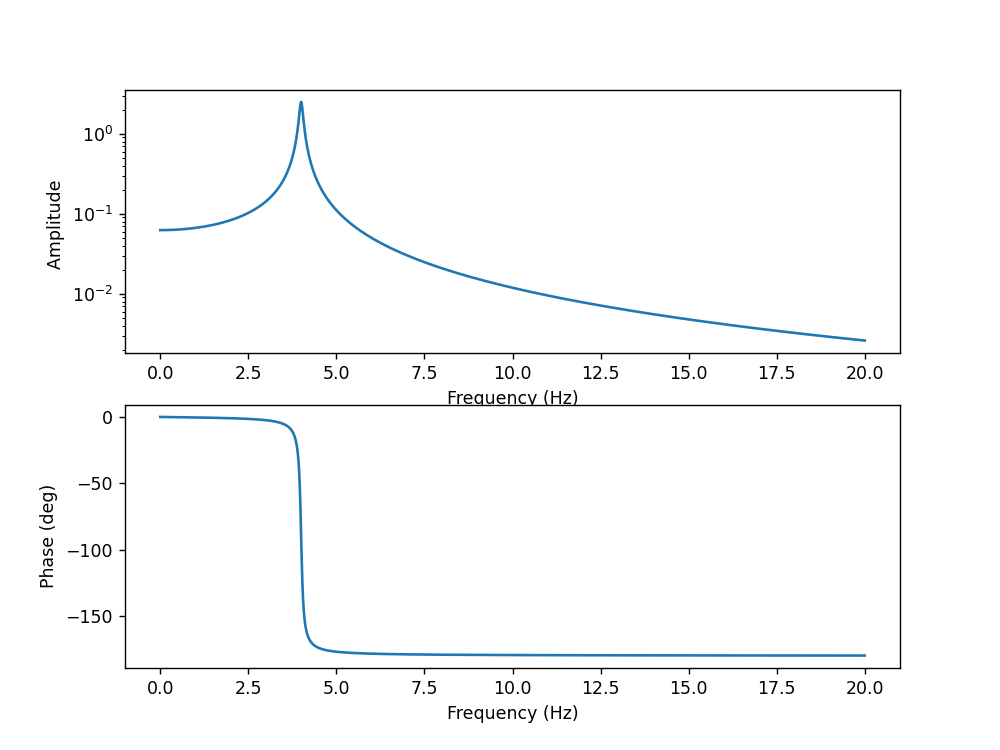

Text(0, 0.5, 'Phase (deg)')

In [17]:
fig,ax= plt.subplots(nrows=2,figsize=(8,6))
ax[0].plot(w,np.abs(H))
ax[0].set_yscale('log')
ax[0].set_ylabel('Amplitude ')
ax[0].set_xlabel('Frequency (Hz)')

ax[1].plot(w,np.angle(H,deg=True))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Phase (deg)')



<b>  Repeats points a),b) and c) with the following successive values of damping: c =
0.1 Ns/m, c = 0.5 Ns/m, c = 10 Ns/m. What are the corresponding values of ξ?
Plot the respective responses on the same plot</b>

<div class="alert alert-block alert-info">
<b> You don't have to understand the following cell. It is a bonus cell for you to have an interactive plot where you can change the system variable and see there impact on the bode diagram </b>

<IPython.core.display.Javascript object>


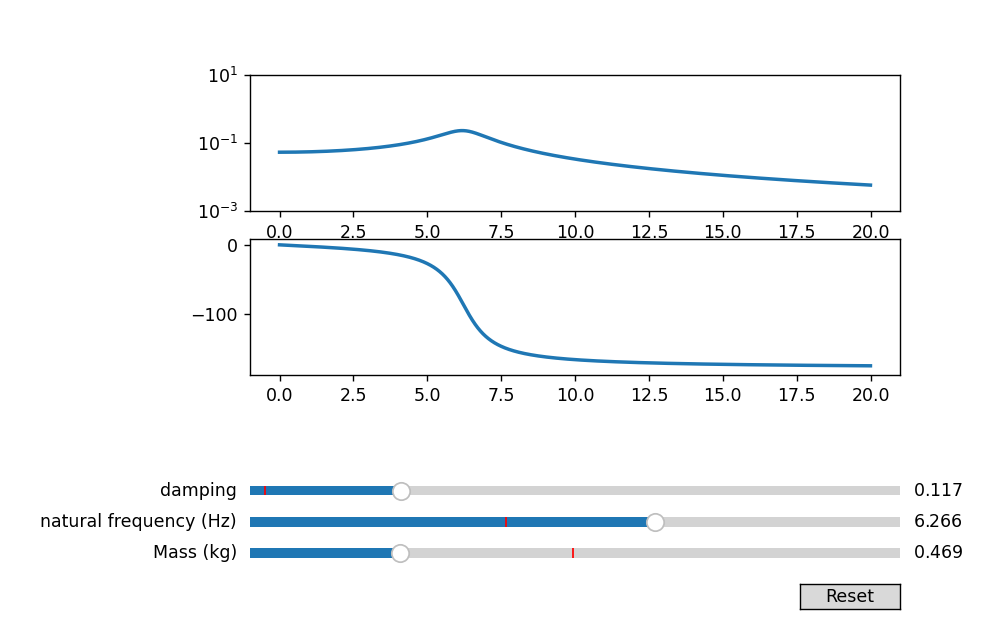

In [18]:
from ipywidgets import interact, fixed
from matplotlib.widgets import Slider, Button


# Define initial parameters
init_m = 1
init_wn = 4
init_xi = 0.0125

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots(nrows=2,figsize=(8,5))
w=np.arange(0,20,0.002)
H ,_=FRF(m=init_m,wn=init_wn,xi=init_xi,w=w)

ax[0].set_yscale('log')
ax[0].set_ylim([1e-3,10])
line0, = ax[0].plot(w,np.abs(H), lw=2)

line1, = ax[1].plot(w,np.angle(H,deg=True), lw=2)
# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.4)



ax_mass = plt.axes([0.25, 0.1, 0.65, 0.03])
m_slider = Slider(
    ax=ax_mass,
    label='Mass (kg)',
    valmin=0.01,
    valmax=2,
    valinit=init_m,
)
ax_wn=plt.axes([0.25, 0.15, 0.65, 0.03])
wn_slider = Slider(
    ax=ax_wn,
    label="natural frequency (Hz)",
    valmin=0.1,
    valmax=10,
    valinit=init_wn,
)
ax_xi = plt.axes([0.25, 0.2, 0.65, 0.03])
xi_slider = Slider(
    ax=ax_xi,
    label="damping",
    valmin=0.001,
    valmax=0.5,
    valinit=init_xi,
)



# The function to be called anytime a slider's value changes
def update(fixed):
    w=np.arange(0,20,0.002)
    H ,_=FRF(m=m_slider.val,wn=wn_slider.val,xi=xi_slider.val,w=w)
    
    line0.set_ydata(np.abs(H))
    line1.set_ydata(np.angle(H,deg=True))

    fig.canvas.draw_idle()

# register the update function with each slider
m_slider.on_changed(update)
wn_slider.on_changed(update)
xi_slider.on_changed(update)


# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    m_slider.reset()
    wn_slider.reset()
    xi_slider.reset()
button.on_clicked(reset)

interact(update(fixed))

## Exercice 2


<b>Consider the same 1-DOF system as in the previous exercise and a value of c = 0.1 Ns/m. Use
Duhamel’s integral to compute the response of the system to:</b>
1. A harmonic force of the form $f(t) = sin(\omega \dot t) \text{ where } \omega = \omega_n$
2. A harmonic force of the form $f(t) = sin(\omega \dot t) \text{ where } \omega = 0.95 \omega_n$
3. A random force generated from a gaussian distribution of mean 0 and variance $\sigma = 1$

__QUICK reminder Only for info__ <br>
$
c=2  \xi  \sqrt{k  m}
$

 __We have already defined a function that compute the impulse response, however in the one you have to define in the following cell the parameter are different, infact, the impulse response function you have to define here takes as input,  $m,\xi, \omega_n \omega_d$__

In [19]:
def impulse_response(m:float,xi:float,wn:float,wd:float,t:np.ndarray):
    """
    Implement the SDOF harmonic response 
    
    Arguments:
    xi, wn and k -- Parameter of the system 
                -- xi is unitless
                -- wn is in rad/s
                -- k is in N.m^-1
    
    Returns:
    h -- the value of function h, computed using 
        expression of the harmonic response
    -----------------------------
    tips : 1.use np.exp and np.sin
    -----------------------------
    """
    ### BEGIN SOLUTION
    h=np.exp(-xi*wn*t)/(m*wd)*np.sin(wd*t)
    ### END SOLUTION
    return h 

In [20]:
t=np.arange(0,500*2*np.pi,0.01)
wn=calcW_n(1,1)
wd= calcW_d(wn,0.01)
h=impulse_response(m=1,xi=0.01,wn=wn,wd=wd,t=t)

<IPython.core.display.Javascript object>


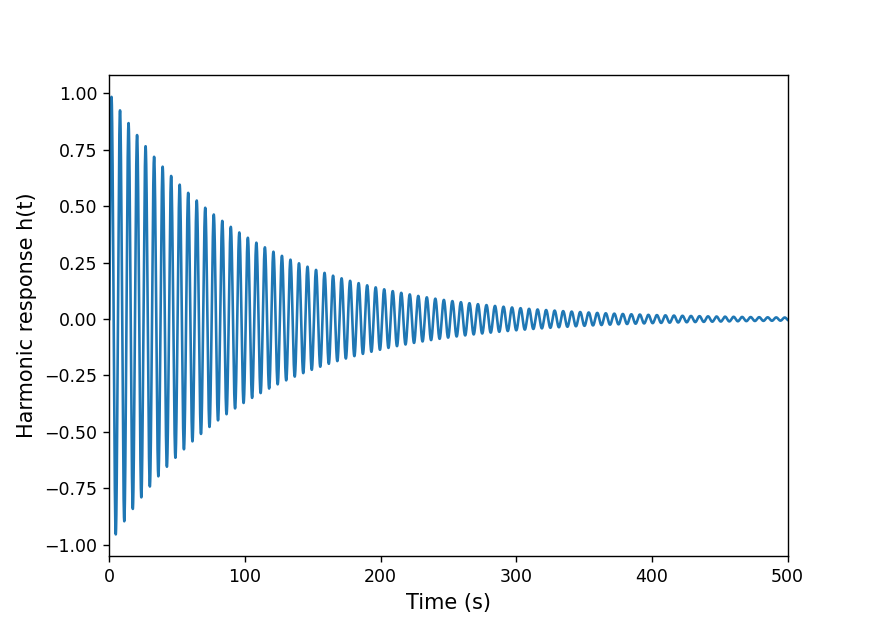

In [21]:
# let's instantiate an empty figure , figsize set the dimension
plt.figure(figsize=(7,5))
# let's fill our figure with the data we found after using our 
# impulse response data
plt.plot(t,h)
# let's add labels to our axes
plt.xlabel('Time (s)',fontsize=12)
plt.ylabel('Harmonic response h(t)',fontsize=12)
plt.xlim([0,500])
plt.show()


In [22]:
t=np.arange(0,500*2*np.pi,0.01)
wn=calcW_n(1,1)
wd= calcW_d(wn,0.01)
h=impulse_response(m=1,xi=0.01,wn=wn,wd=wd,t=t)

<IPython.core.display.Javascript object>


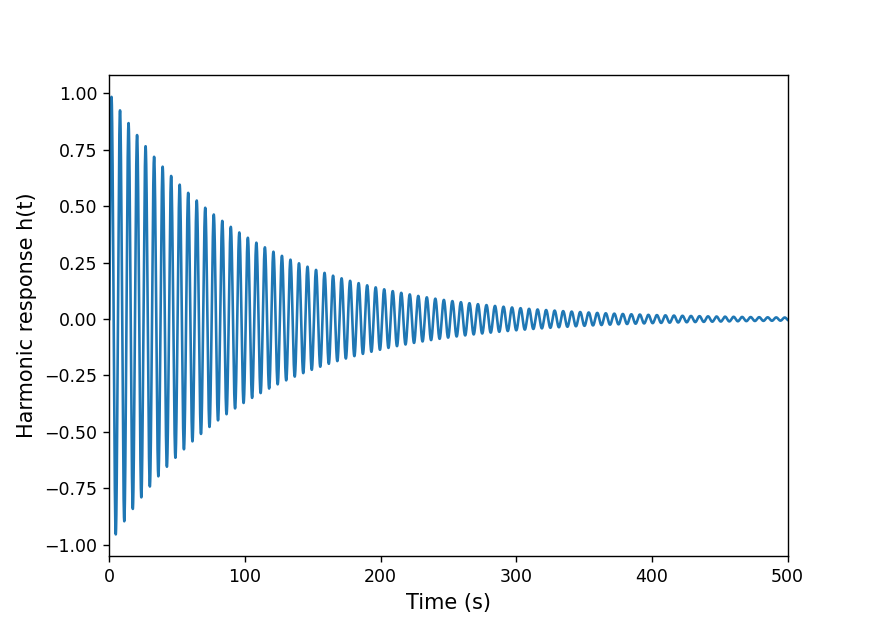

In [23]:
# let's instantiate an empty figure , figsize set the dimension
plt.figure(figsize=(7,5))
# let's fill our figure with the data we found after using our 
# impulse response data
plt.plot(t,h)
# let's add labels to our axes
plt.xlabel('Time (s)',fontsize=12)
plt.ylabel('Harmonic response h(t)',fontsize=12)
plt.xlim([0,500])
plt.show()

In [ ]:
! pip install scipy

In [ ]:
from scipy import signal
def harmonic_response(force:np.ndarray,h:np.ndarray,t:np.ndarray):
    """
    Implement the SDOF harmonic response 
    
    Arguments:
    m, c and k -- Parameter of the system 
                -- m is in kg
                -- c is in N.s.m^-1
                -- k is in N.m^-1
    
    Returns:
    h -- the value of function h, computed using 
        expression of the impulse response
    -----------------------------
    tips :  1.call the function defined above to compute Xi and Wn and 
              save them in a local variable
            2.define a variable wd first
            3.use np.exp and np.sin
    -----------------------------
    """
    # as we are computing a numerical solution we need to define 
    # a time vector
    
    ### BEGIN SOLUTION

    u=signal.convolve(h,force,method='fft',mode='same')*t[2]
    ### END SOLUTION
    return u,t
    

In [ ]:
t=np.arange(0,500*2*np.pi,0.1)
wn=calcW_n(1,1)
wd= calcW_d(wn,0.01)
h=impulse_response(m=1,xi=0.01,wn=wn,wd=wd,t=t)
u,t=harmonic_response(force=np.sin(1*wn*t),h=h,t=t)

In [ ]:
# let's instantiate an empty figure , figsize set the dimension
plt.figure(figsize=(7,5))
# let's fill our figure with the data we found after using our 
# impulse response data
plt.plot(t,u)
# let's add labels to our axes
plt.xlabel('Time (s)',fontsize=12)
plt.ylabel('Harmonic response u(t)',fontsize=12)
plt.xlim([0,500])
plt.show()

In [ ]:
t=np.arange(0,500*2*np.pi,0.1)
wn=calcW_n(1,1)
wd= calcW_d(wn,0.01)
h=impulse_response(m=1,xi=0.01,wn=wn,wd=wd,t=t)
u1,t=harmonic_response(force=np.sin(1*wn*t),h=h,t=t)
u2,t=harmonic_response(force=np.sin(0.95*wn*t),h=h,t=t)


In [ ]:
# let's instantiate an empty figure , figsize set the dimension
plt.figure(figsize=(9,5))
# let's fill our figure with the data we found after using our 
# impulse response data
plt.plot(t,u1,label='w=wn')
plt.plot(t,u2,label='w=95%wn')
# let's add labels to our axes
plt.xlabel('Time (s)',fontsize=12)
plt.ylabel('Harmonic response u(t)',fontsize=12)
plt.xlim([0,500])
plt.show()

In [ ]:
np.random.seed(42)

In [ ]:
t=np.arange(0,500*2*np.pi,0.1)
wn=calcW_n(1,1)
wd= calcW_d(wn,0.01)
h=impulse_response(m=1,xi=0.01,wn=wn,wd=wd,t=t)
force=np.random.normal(loc=0.0, scale=1.0, size=h.shape)
u,t=harmonic_response(force=force,h=h,t=t)


In [ ]:
# let's instantiate an empty figure , figsize set the dimension
plt.figure(figsize=(7,5))
# let's fill our figure with the data we found after using our 
# impulse response data
plt.plot(t,u,label='w=wn')
# let's add labels to our axes
plt.xlabel('Time (s)',fontsize=12)
plt.ylabel('Harmonic response u(t)',fontsize=12)
plt.xlim([0,500])
plt.show()